### The Data:
-- Disease: The name of the Infectious Diseases reported. <br>
-- County: The county in which the case resided when they were diagnosed. <br>
-- Year: Estimated onset date is the date closest to the time when symptoms first appeared. <br>
-- Sex: Patient's sex. <br>
-- Cases: The number of cases reported per disease meeting the surveillance case definition by County, Year, and Sex. <br>
-- Population: Estimated population size (rounded to the nearest integer) for each County, Year, Sex strata. <br>
-- Rate: Incidence rate is the number of cases per 100,000 population. <br>

### Load data and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./infectious-diseases-by-county-year-and-sex.csv')

In [3]:
df.head()

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,Amebiasis,Alameda,2001,Female,7.0,746596,0.938*,0.377,1.932
1,Amebiasis,Alameda,2001,Male,9.0,718968,1.252*,0.572,2.376
2,Amebiasis,Alameda,2001,Total,16.0,1465564,1.092*,0.624,1.773
3,Amebiasis,Alameda,2002,Female,4.0,747987,0.535*,0.146,1.369
4,Amebiasis,Alameda,2002,Male,5.0,720481,0.694*,0.225,1.620


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164433 entries, 0 to 164432
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       164433 non-null  object 
 1   County        164433 non-null  object 
 2   Year          164433 non-null  int64  
 3   Sex           164433 non-null  object 
 4   Cases         160313 non-null  float64
 5   Population    164433 non-null  int64  
 6   Rate          164433 non-null  object 
 7   Lower_95__CI  159452 non-null  float64
 8   Upper_95__CI  159452 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 11.3+ MB


In [5]:
df.describe()

,Year,Cases,Population,Lower_95__CI,Upper_95__CI
count,164433.000000,160313.000000,1.644330e+05,159452.000000,159452.000000
mean,2010.280947,10.654251,8.480403e+05,0.687663,22.082535
std,5.489577,142.954290,3.527101e+06,5.481628,74.132953
min,2001.000000,0.000000,5.630000e+02,0.000000,0.009000
25%,2006.000000,0.000000,2.924500e+04,0.000000,1.247000
50%,2010.000000,0.000000,1.252340e+05,0.000000,4.080000
75%,2015.000000,0.000000,4.224870e+05,0.000000,14.326000
max,2019.000000,10001.000000,3.995910e+07,387.732000,653.077000


In [6]:
# Check unique values
df.Sex.unique()

array(['Female', 'Male', 'Total'], dtype=object)

In [7]:
df.Sex.value_counts()

Female    54811
Male      54811
Total     54811
Name: Sex, dtype: int64

There seems to be summed ("Total") rows within the data that are equal in number to the summed male and female for each group of cases. I'll drop these rows.

In [8]:
# Check number of unique diseases
len(df.Disease.unique())

53

### Data Cleaning
1. Drop missing values rows.


In [9]:
# Count the number of missing values in each column and sort them.
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count' , '%']
missing.sort_values(by='count', ascending = False)

,count,%
Lower_95__CI,4981,3.029197
Upper_95__CI,4981,3.029197
Cases,4120,2.505580
Disease,0,0.000000
County,0,0.000000
Year,0,0.000000
Sex,0,0.000000
Population,0,0.000000
Rate,0,0.000000


In [10]:
# Examine rows with missing Cases values. 
df[df['Cases'].isnull()]

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
249,Amebiasis,Calaveras,2008,Female,NaN,22864,SC,NaN,NaN
250,Amebiasis,Calaveras,2008,Male,NaN,22838,SC,NaN,NaN
657,Amebiasis,Glenn,2011,Female,NaN,14044,SC,NaN,NaN
658,Amebiasis,Glenn,2011,Male,NaN,14329,SC,NaN,NaN
669,Amebiasis,Glenn,2015,Female,NaN,14280,SC,NaN,NaN
...,...,...,...,...,...,...,...,...,...
164338,Zika Virus Infection,Sutter,2016,Male,NaN,48745,SC,NaN,NaN
164340,Zika Virus Infection,Sutter,2017,Female,NaN,49446,SC,NaN,NaN
164341,Zika Virus Infection,Sutter,2017,Male,NaN,48896,SC,NaN,NaN
164421,Zika Virus Infection,Yuba,2016,Female,NaN,37475,SC,NaN,NaN


In [11]:
df.shape

(164433, 9)

In [12]:
# Drop rows with missing values 
data = df[df['Cases'].notnull()]

In [13]:
# Drop rows with Sex=Total
data = data[data.Sex != "Total"]

In [14]:
data.shape

(105502, 9)

In [15]:
data.Sex.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105502 entries, 0 to 164431
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       105502 non-null  object 
 1   County        105502 non-null  object 
 2   Year          105502 non-null  int64  
 3   Sex           105502 non-null  object 
 4   Cases         105502 non-null  float64
 5   Population    105502 non-null  int64  
 6   Rate          105502 non-null  object 
 7   Lower_95__CI  104936 non-null  float64
 8   Upper_95__CI  104936 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.0+ MB


In [17]:
data.drop(labels=['Lower_95__CI', 'Upper_95__CI'], axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105502 entries, 0 to 164431
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Disease     105502 non-null  object 
 1   County      105502 non-null  object 
 2   Year        105502 non-null  int64  
 3   Sex         105502 non-null  object 
 4   Cases       105502 non-null  float64
 5   Population  105502 non-null  int64  
 6   Rate        105502 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.4+ MB


### Examine rate feature
Recalculate rate since there are a lot of NaN in original column

In [19]:
# Get rid of extraneous strings
data['Rate'] = data['Rate'].str.replace('*', '')
data['Rate'] = data['Rate'].str.replace('-', '')

In [20]:
data['Rate']

0         0.938
1         1.252
3         0.535
4         0.694
6         0.134
          ...  
164425         
164427         
164428         
164430         
164431         
Name: Rate, Length: 105502, dtype: object

In [21]:
data['Rate'] = data['Rate'].apply(pd.to_numeric, errors='coerce')
data['Rate'].isnull().sum()

85847

In [22]:
# Recalculate rate since there are a lot of NaN in original column
data['Rate'] = data['Cases'] / data['Population'] * 100000

In [23]:
data.Rate.isnull().sum()

0

In [24]:
data.head()

,Disease,County,Year,Sex,Cases,Population,Rate
0,Amebiasis,Alameda,2001,Female,7.0,746596,0.937589
1,Amebiasis,Alameda,2001,Male,9.0,718968,1.251794
3,Amebiasis,Alameda,2002,Female,4.0,747987,0.534769
4,Amebiasis,Alameda,2002,Male,5.0,720481,0.693981
6,Amebiasis,Alameda,2003,Female,1.0,747441,0.133790


### Examime cases feature
There are 85,704 rows where there are no cases of any disease. For the purposes of this data exploration, I am going to drop these rows, since I am only interested in cases when disease was detected.

In [25]:
data[data['Cases'] == 0]

,Disease,County,Year,Sex,Cases,Population,Rate
57,Amebiasis,Alpine,2001,Female,0.0,589,0.0
58,Amebiasis,Alpine,2001,Male,0.0,648,0.0
60,Amebiasis,Alpine,2002,Female,0.0,594,0.0
61,Amebiasis,Alpine,2002,Male,0.0,654,0.0
63,Amebiasis,Alpine,2003,Female,0.0,596,0.0
...,...,...,...,...,...,...,...
164425,Zika Virus Infection,Yuba,2017,Male,0.0,38567,0.0
164427,Zika Virus Infection,Yuba,2018,Female,0.0,38656,0.0
164428,Zika Virus Infection,Yuba,2018,Male,0.0,38838,0.0
164430,Zika Virus Infection,Yuba,2019,Female,0.0,39017,0.0


In [26]:
dat = data[data['Cases'] != 0]

In [27]:
len(dat.Disease.unique())

50

# EDA


I'm interested in examining the top 10 infectious diseases found in California between 2010-2019. Selecting for diseases where there were at least 250 cases per year (in either males or females). This leaves 10 diseases out of the original 50 diseases.

In [28]:
# Examine data where case number is high (>100 per year)
dis_high = dat[dat['Cases'] > 250] 
len(dis_high.Disease.unique())

10

In [29]:
dis_high.shape

(482, 7)

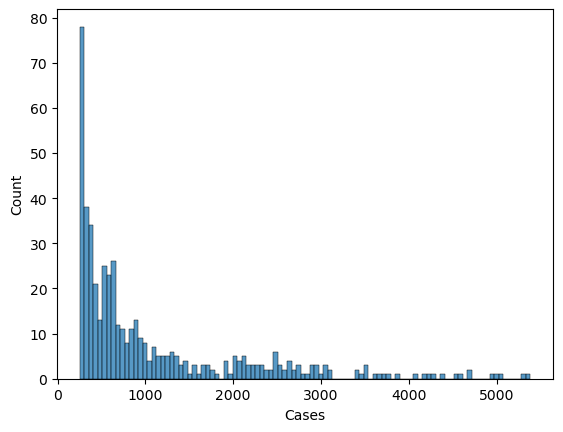

In [30]:
# Examine histogram of Cases
dis_high['Cases_log'] = np.log10(dis_high['Cases'])
sns.histplot(data=dis_high, x='Cases', bins=100)
plt.show();

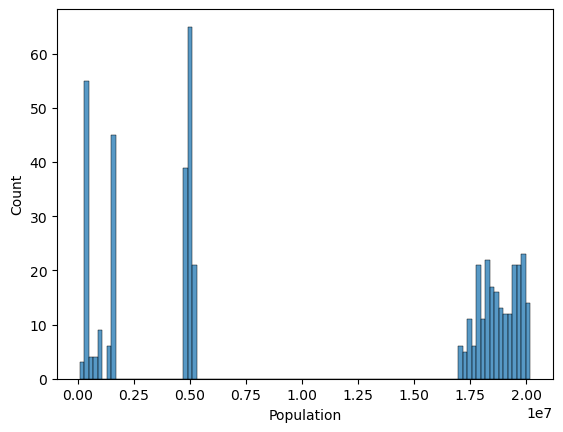

In [31]:
# Examine histogram of each variable
sns.histplot(data=dis_high, x='Population', bins=100)
plt.show();

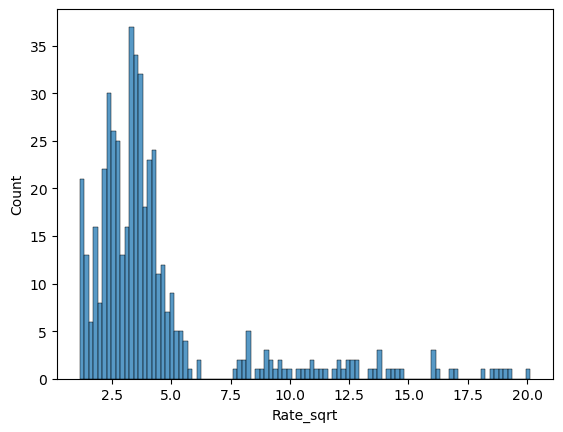

In [32]:
# Examine histogram of each variable
dis_high['Rate_sqrt'] = np.sqrt(dis_high['Rate'])
sns.histplot(data=dis_high, x='Rate_sqrt', bins=100)
plt.show();

In [ ]:
# Create dataframe: Percent of total cases for each disease 
diseases = pd.DataFrame(dis_high.groupby(['Disease'])['Cases'].sum())
diseases = diseases.reset_index()

# Calculate percentage for each disease for each county 
diseases['Perc_cases'] = diseases['Cases'] / diseases['Cases'].sum()
diseases

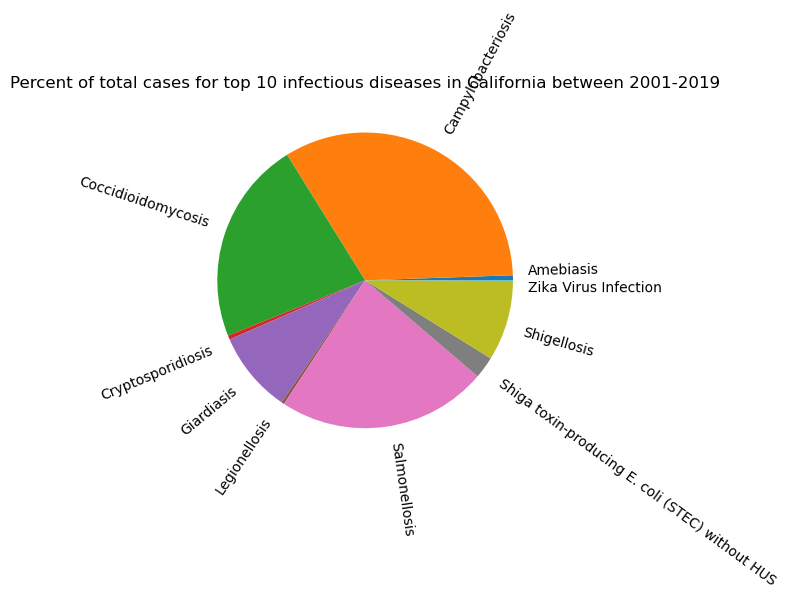

In [103]:
# Pie chart of all diseases
plt.pie(diseases['Perc_cases'],labels = diseases.Disease, rotatelabels=True)
plt.title('Percent of total cases for top 10 infectious diseases in California between 2001-2019');

The pie chart shows the percent of total cases for top 10 infectious diseases in California between 2001-2019. We can see that several diseases have a much higher caseload than the others. Let's examine the data further to see whether there are trends across years, by county, by population size, or between the sexes.

### Question 1: Are there trends across years?
-- Do overall case numbers increase across years?<br>
-- Does rate increase by year? <br>
-- What are the number of cases of different diseases by year? <br>

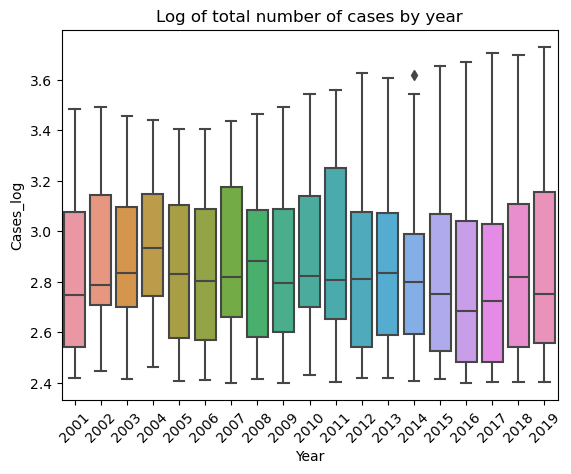

In [33]:
sns.boxplot(data=dis_high, x='Year', y='Cases_log')
plt.xticks(rotation=45)
plt.title('Log of total number of cases by year') ;

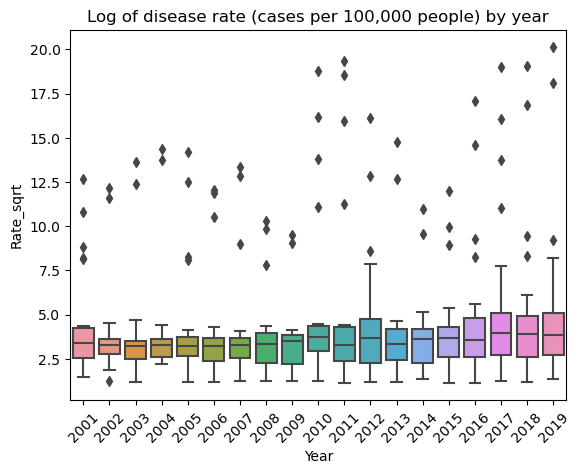

In [117]:
sns.boxplot(data=dis_high, x='Year', y='Rate_sqrt')
plt.xticks(rotation=45)
plt.title('Log of disease rate (cases per 100,000 people) by year') ;

In [47]:
# Create dataframe: Number of cases for each disease by year

disease_year = pd.DataFrame(dis_high.groupby(['Year','Disease'])['Cases'].sum())
disease_year = disease_year.reset_index()

disease_year['Year'] = pd.to_datetime(disease_year.Year, format='%Y')

disease_year.head()

,Year,Disease,Cases
0,2001-01-01,Amebiasis,364.0
1,2001-01-01,Campylobacteriosis,7273.0
2,2001-01-01,Coccidioidomycosis,2428.0
3,2001-01-01,Giardiasis,3471.0
4,2001-01-01,Salmonellosis,5115.0


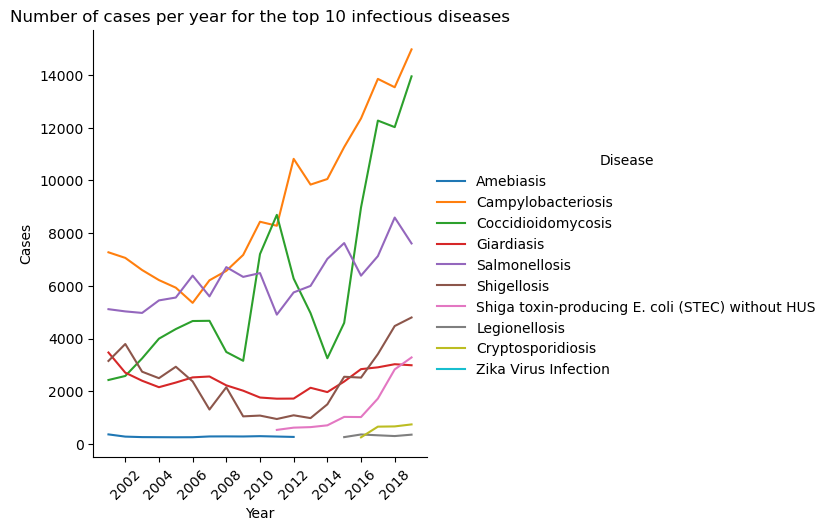

In [149]:
# Plot
sns.relplot(data=disease_year, x="Year", y="Cases", hue="Disease", kind="line")
plt.xticks(rotation=45);

plt.title('Number of cases per year for the top 10 infectious diseases');

From the graphs above, we can see that there is no increase in overall case numbers or disease rates from 2001-2019. However, there is a large increase in particular diseases, namely Campylobacteriosis and Coccidioidomycosis, between 2001 and 2019.

### Question 2: Are there trends by county?
-- Are there different diseases seen in each county?<br>
-- Are overall case numbers higher in some counties than in others? <br>


In [34]:
len(dis_high.County.unique())

11

In [40]:
# Create dataframe: Number of cases for each disease by county
disease_county = pd.DataFrame(dis_high.groupby(['County','Disease'])['Cases'].sum())
disease_county = disease_county.reset_index()

# Calculate percentage for each disease for each county 
disease_county['Perc_cases'] = disease_county['Cases'] / disease_county.groupby('County')['Cases'].transform('sum')

disease_county.head()

,County,Disease,Cases,Perc_cases
0,Alameda,Campylobacteriosis,1141.0,1.000000
1,California,Amebiasis,2841.0,0.007310
2,California,Campylobacteriosis,128657.0,0.331050
3,California,Coccidioidomycosis,73454.0,0.189006
4,California,Cryptosporidiosis,2321.0,0.005972


In [ ]:
# Plot a stacked bar chart for each county -- struggling to figure this out.

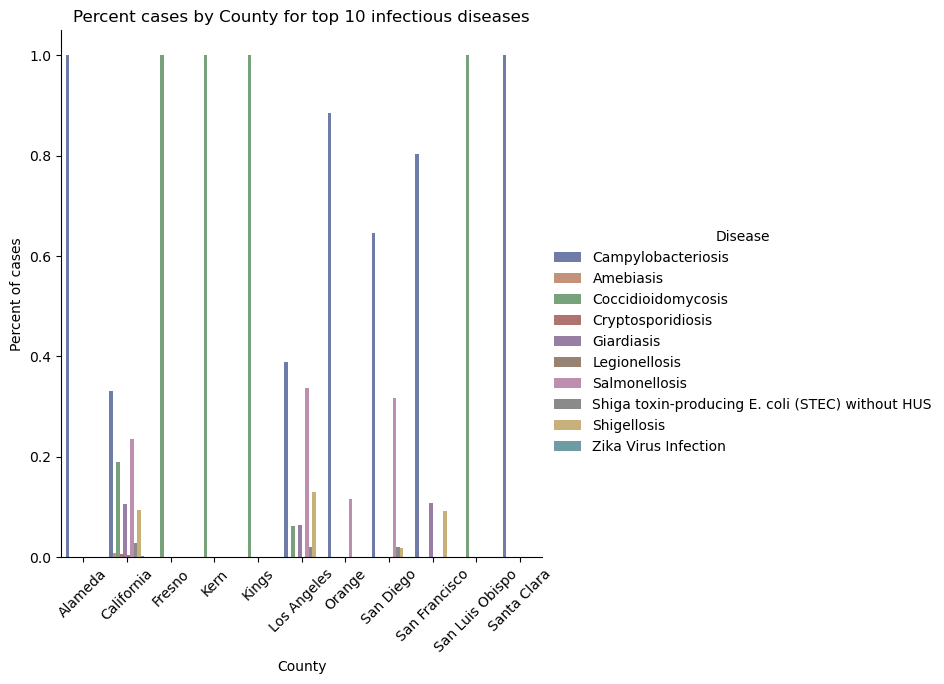

In [44]:
# Plot
# Draw a nested barplot by County and disease (Percent cases)
g = sns.catplot(
    data=disease_county, kind="bar",
    x="County", y="Perc_cases", hue="Disease",
     palette="dark", alpha=.6, height=6
)
plt.xticks(rotation=45)
plt.ylabel('Percent of cases')
plt.title('Percent cases by County for top 10 infectious diseases');

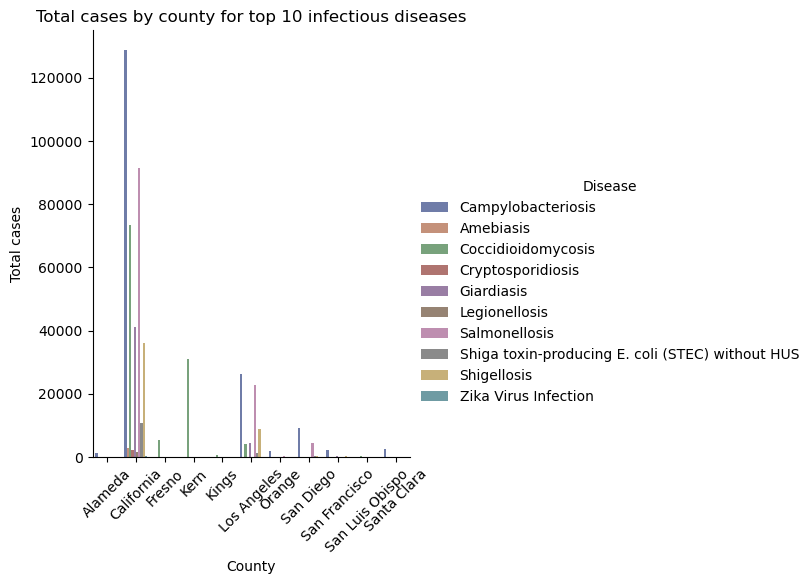

In [55]:
# Plot
# Draw a nested barplot by County and disease (Total cases)
g = sns.catplot(
    data=disease_county, kind="bar",
    x="County", y="Cases", hue="Disease",
    palette="dark", alpha=.6)

plt.xticks(rotation=45)
plt.ylabel('Total cases')
plt.title('Total cases by county for top 10 infectious diseases');

The top graph above shows that particular counties are responsible for spikes in certain diseases (namely, Coccidioidomycosis and Capylobacteriosis), and that in some counties these diseases far outstrip all other infectious diseases. Note -- we cannot accurately assess total cases by county since all unknown counties are lumped into the "California" category.

### Question 3: Does population size play a role in which diseases are present?
-- Do case numbers or disease rates increase with population size? <br>

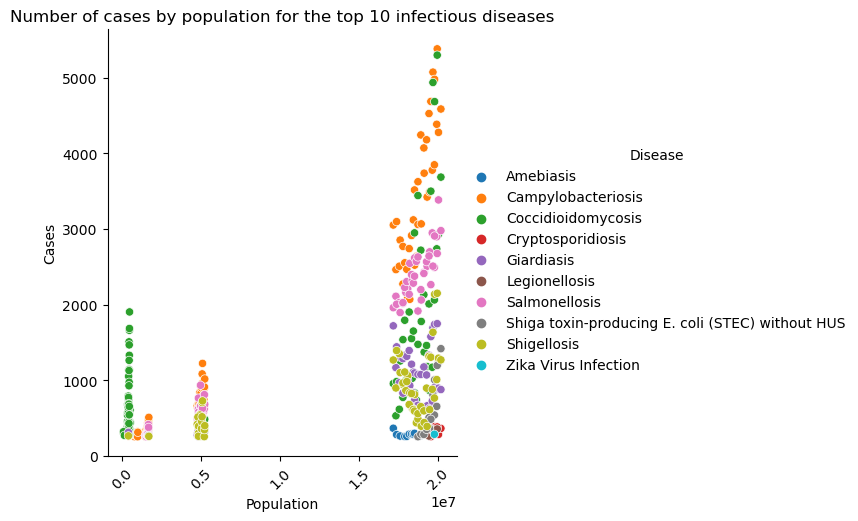

In [61]:
# Plot total cases by population
sns.relplot(data=dis_high, x="Population", y="Cases", hue="Disease", kind="scatter")
plt.xticks(rotation=45);

plt.title('Number of cases by population for the top 10 infectious diseases');

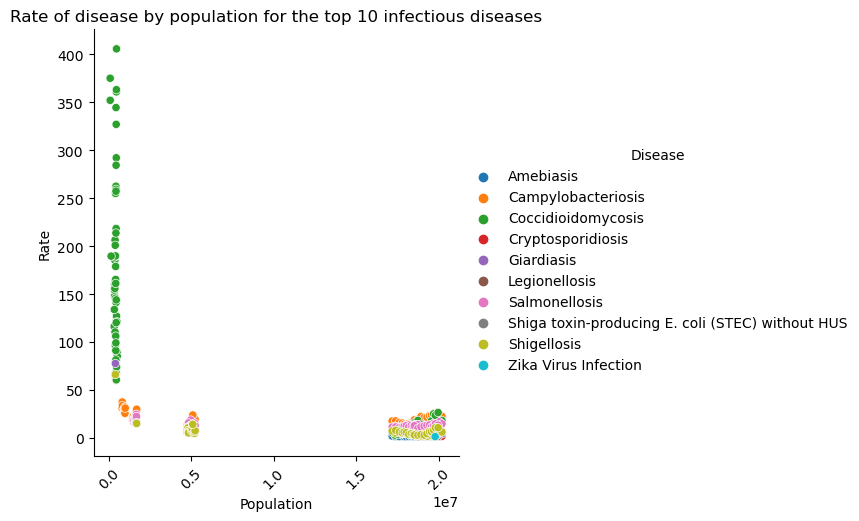

In [62]:
# Plot case rate by population
sns.relplot(data=dis_high, x="Population", y="Rate", hue="Disease", kind="scatter")
plt.xticks(rotation=45);

plt.title('Rate of disease by population for the top 10 infectious diseases');

Looking at the total number of cases by population, we can see that the number of cases (unsurprisngly) increases when there is a larger population, especially for certain diseases. However, what is more interesting is looking at the disease rates (cases/100,000 people) -- above, we can see that the rate for Coccidioidomycosis is much higher than all other diseases, even when the population is smaller. 

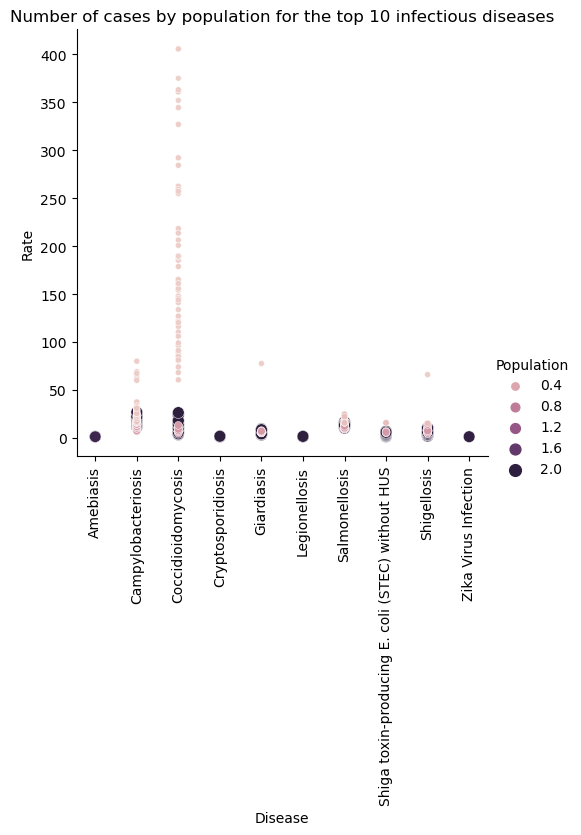

In [59]:
# Plot disease rate for each disease
sns.relplot(data=dis_high, x="Disease", y="Rate", size="Population", hue="Population", kind="scatter")
plt.xticks(rotation=90);

plt.title('Number of cases by population for the top 10 infectious diseases');

Here is another way of visualizing the same thing -- namely, that rates for Coccidioidomycosis far outstrip all other top diseases, even when the population is small.

### Question 4: Are there differences between males and females?
-- Do case numbers differ between males and females? <br>
-- Do disease types differ between males and females? <br>
-- Do rates for Coccidioidomycosis differ between males and females?

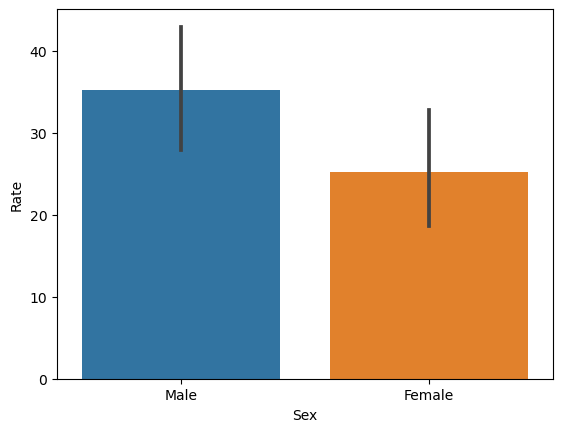

In [64]:
sns.barplot(data=dis_high, x='Sex', y='Rate');

It looks as though disease rates are higher in males than females, although error bars indicate a large degree of variability. Let's explore whether there are certain diseases driving these differences.

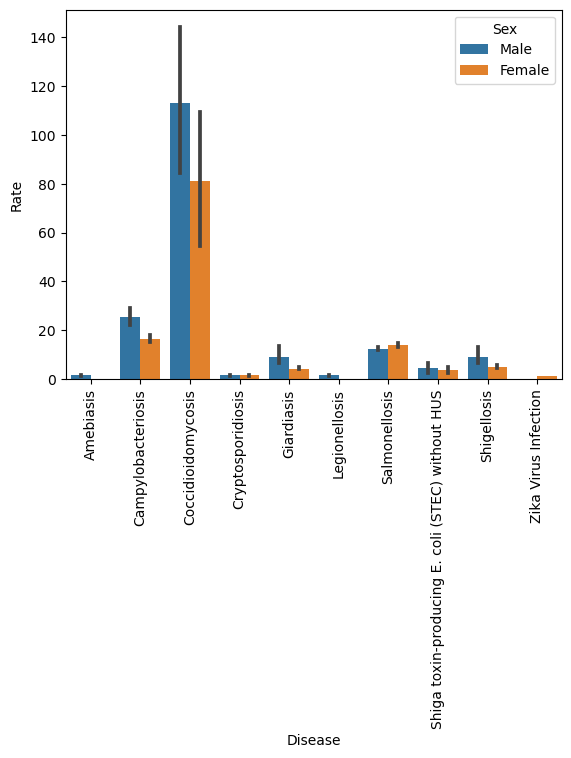

In [86]:
sns.barplot(data=dis_high, x='Disease', y="Rate", hue="Sex")
plt.xticks(rotation=90);

The largest difference in disease rates between males and females is for Coccidioidomycosis, where males have a much higher rate (although again there is a high degree of variability in the data). 

# Conclusion
### Key findings from the explortory data analysis include:
1. There are no increases in overall case numbers or disease rates across years, but particular diseases -- Campylobacteriosis and Coccidioidomycosis -- do increase between 2001 and 2019.<br>
2. The two most prevalent infectious diseases are found in particular counties, indicating that there may have been localized outbreaks.
3.  Population size does not appear to be linked to disease rates (although overall caseload does increase with population size). 
4.  Interestingly, the rate for Coccidioidomycosis is much higher than all other diseases, even when the population is smaller. Since Coccidioidomycosis (of Valley Fever) is a fungal illness spread by wind, and is not contagious, it makes sense that disease rates are not linked to population size. Instead, the high rates indicate an outbreak linked to environmental conditions. 
5.  Men appear to have slightly higher rates of disease than women for the diseases observed. Specifically, the higher rates are linked to higher rates of Coccidioidomycosis, which is likely linked to exposure to the fungus through .